<a href="https://colab.research.google.com/github/jaideep99/MLAssignment8/blob/master/MLab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Preprocessing

In [4]:
data = pd.read_csv('/content/drive/My Drive/attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Label Encoding

In [5]:
le = LabelEncoder()
change = ['Department','BusinessTravel','Attrition','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

for x in change:
  data[x] = le.fit_transform(data[x])

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#DataAnalysis

###Target Value Counts

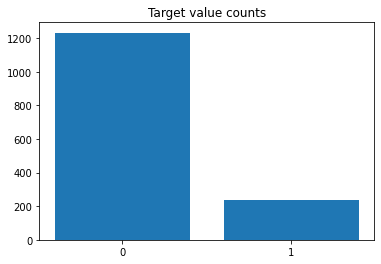

In [7]:
counts = data['Attrition'].value_counts().to_dict()

plt.bar(counts.keys(),counts.values())
plt.title('Target value counts')
plt.xticks([0,1])
plt.show()

In [0]:
data.drop(['Over18','EmployeeNumber','EmployeeCount','StandardHours'],axis=1,inplace=True)

###Continuous Variable Analysis

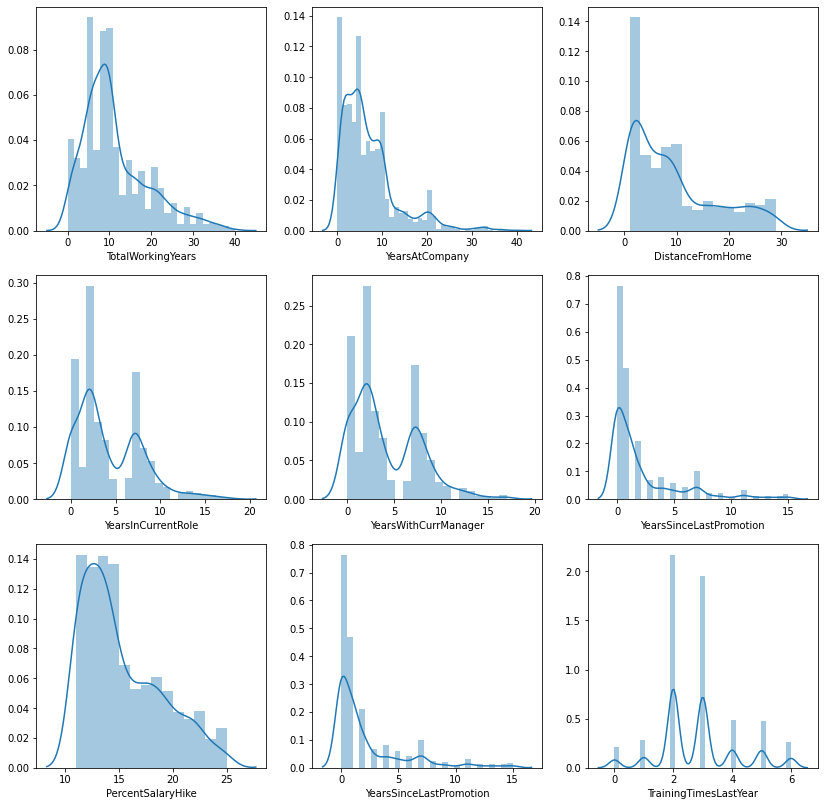

In [9]:
#For categorical variables 
#Distribution plots

fig,ax = plt.subplots(3,3, figsize=(14,14))
sns.distplot(data['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(data['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(data['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(data['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(data['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(data['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(data['TrainingTimesLastYear'], ax = ax[2,2]) 
plt.show()

###Categorical Variables Analysis

In [0]:
feats = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction","JobLevel","BusinessTravel",'Department','EducationField','OverTime']

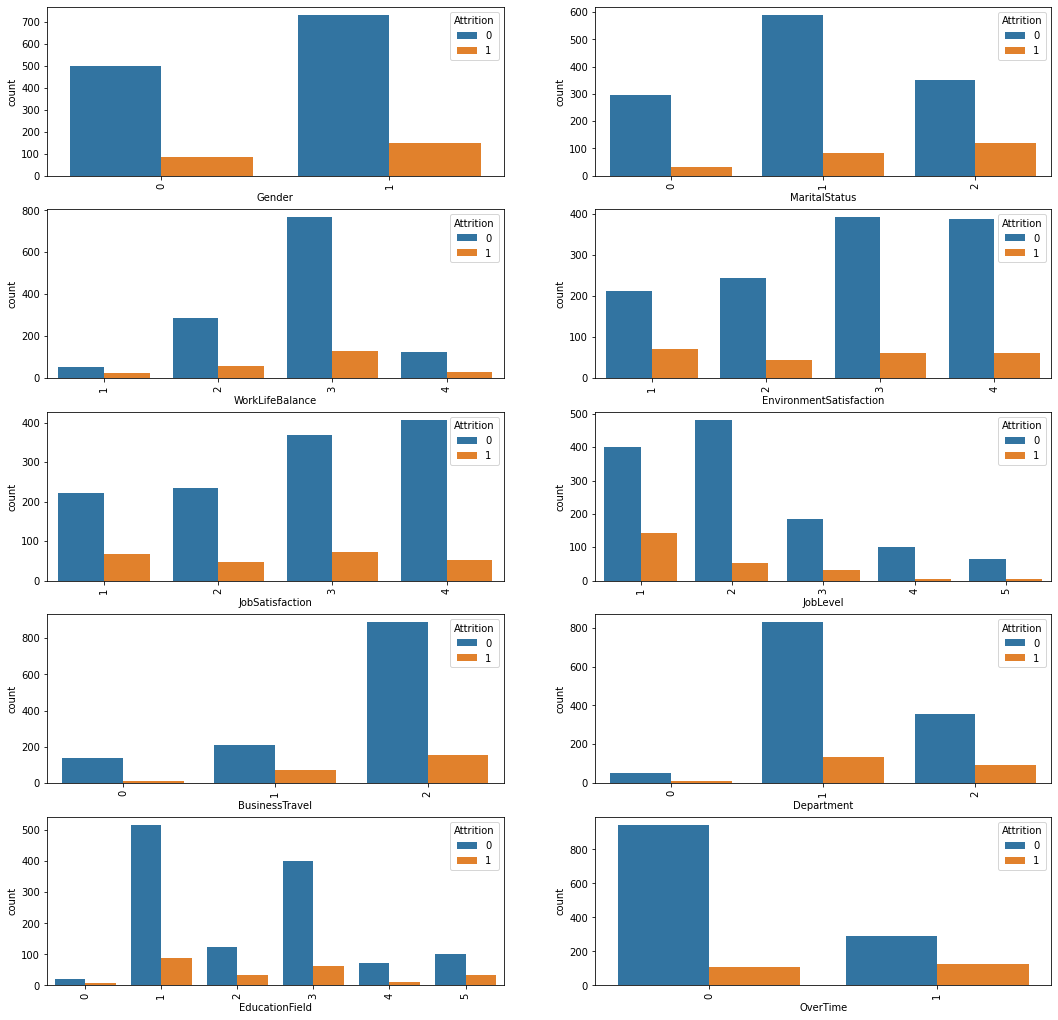

In [11]:
ax = plt.figure(figsize=(18,18))
for i,j in enumerate(feats,1):
  plt.subplot(5,2,i)
  sns.countplot(data=data,x=j,hue='Attrition')
  plt.xticks( rotation=90)

plt.show()

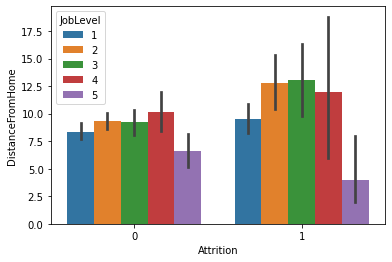

In [12]:
#Breakdown of Distance from home by JobLevel and Attrition

sns.barplot(data=data,x='Attrition',y='DistanceFromHome',hue='JobLevel')
plt.show()

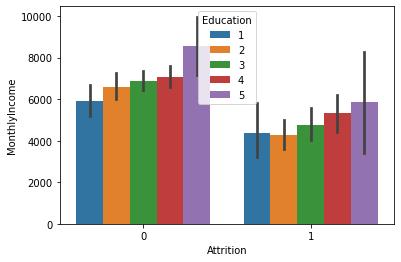

In [13]:
#Breakdown of average monthly income by education and attrition

sns.barplot(data=data,x='Attrition',y='MonthlyIncome',hue='Education')
plt.show()

##Feature Selection

###Multicollinearity Check



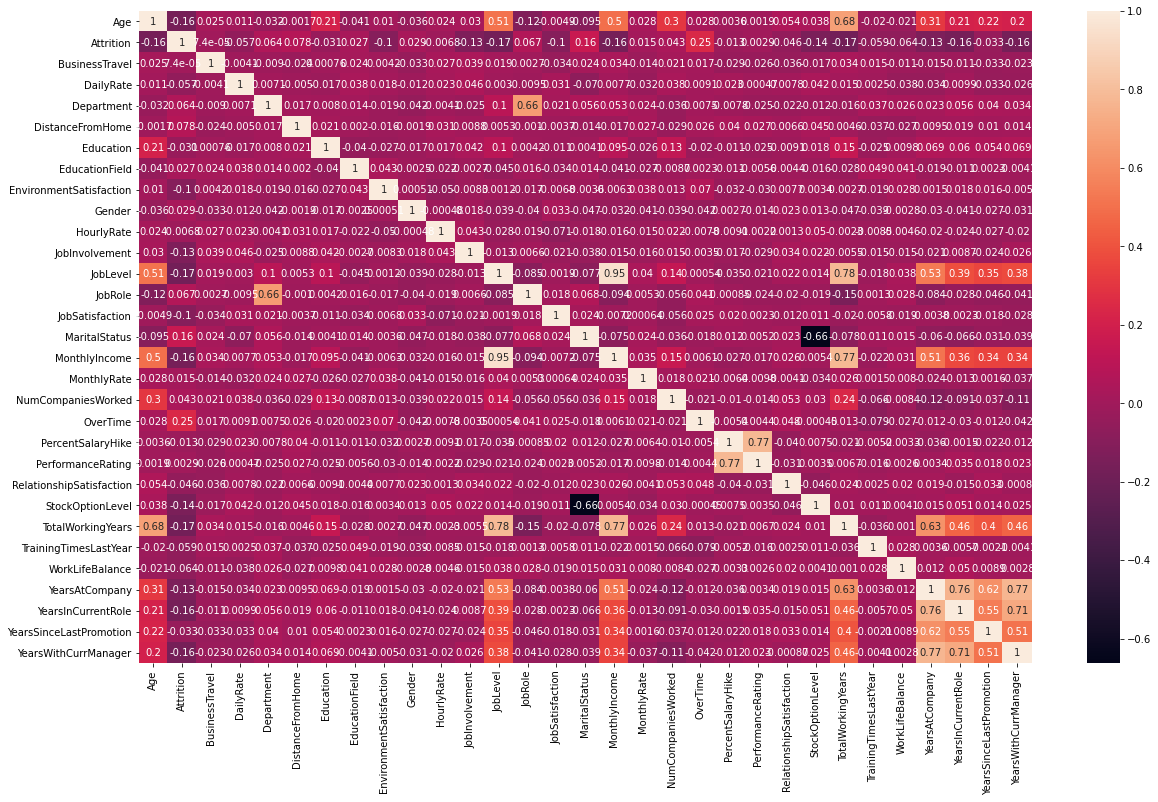

In [14]:
correlation = data.corr()

ax = plt.figure(figsize=(20,12))
sns.heatmap(correlation,annot=True)
plt.show()

In [15]:
cols = data.columns
formula = 'Attrition ~ '
for x in cols:
  if(x=='Attrition'):
    continue
  formula = formula + x + ' + '
formula = formula[:-2]
print(formula)

Attrition ~ Age + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager 


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

yvar, Xvar = dmatrices(formula, data, return_type='dataframe')

# For each Xvar, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(Xvar.values, i) for i in range(Xvar.shape[1])]
vif["Predictors"] = Xvar.columns
vif.round(3)

,VIF,Predictors
0,230.188,Intercept
1,2.054,Age
2,1.016,BusinessTravel
3,1.024,DailyRate
4,1.942,Department
5,1.017,DistanceFromHome
6,1.064,Education
7,1.016,EducationField
8,1.018,EnvironmentSatisfaction
9,1.019,Gender


In [0]:
#dropping columns based on correlation matrix and VIF Factors 

cols = ['YearsWithCurrManager','YearsAtCompany','TotalWorkingYears','PerformanceRating','MonthlyIncome','StockOptionLevel','JobRole','JobLevel']
data.drop(cols,axis=1,inplace=True)

##Model Selection

###Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.25,random_state=42)

print(train.shape,test.shape)

(1102, 23) (368, 23)


In [0]:
y_train = train['Attrition']
x_train = train.drop(['Attrition'],axis=1)

y_test = test['Attrition']
x_test = test.drop(['Attrition'],axis=1)

In [0]:
compare = {}

###RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10,50,100,150],'max_depth':[10,50,100,150]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose=0)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'max_depth': 10, 'n_estimators': 50}


In [22]:
rf_model = RandomForestClassifier(max_depth=100,n_estimators=10)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
pred = rf_model.predict(x_test)

acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
pscore = precision_score(y_test,pred)

compare['RandomForest']= [acc,f1,pscore]
print('Accuracy_score : ',acc)
print('F1_score : ',f1)
print('Precision_score : ',pscore)
print()
print('ConfusionMatrix : \n',confusion_matrix(y_test,pred,labels=[0,1]))

Accuracy_score :  0.8722826086956522
F1_score :  0.11320754716981132
Precision_score :  0.6

ConfusionMatrix : 
 [[318   2]
 [ 45   3]]


###Feature Importance

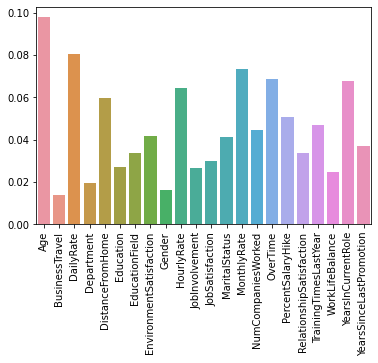

Feature Importances : 
                      Feature  Feature Importance
0                        Age            0.097940
1             BusinessTravel            0.013822
2                  DailyRate            0.080363
3                 Department            0.019514
4           DistanceFromHome            0.059473
5                  Education            0.027012
6             EducationField            0.033666
7    EnvironmentSatisfaction            0.041639
8                     Gender            0.016339
9                 HourlyRate            0.064209
10            JobInvolvement            0.026540
11           JobSatisfaction            0.030075
12             MaritalStatus            0.041328
13               MonthlyRate            0.073508
14        NumCompaniesWorked            0.044759
15                  OverTime            0.068886
16         PercentSalaryHike            0.050512
17  RelationshipSatisfaction            0.033852
18     TrainingTimesLastYear            0.047

In [24]:
imps = rf_model.feature_importances_

sns.barplot(x=x_train.columns,y=imps)
plt.xticks(rotation=90)
plt.show()

d = dict(zip(x_train.columns,imps))
imp_df = pd.DataFrame(d.items(),columns=['Feature','Feature Importance'])
print('Feature Importances : \n',imp_df)

###Support Vector Machines

In [25]:
from sklearn.svm import SVC

#hyper parameter tuning is taking lot of time for SVC so, it is excluded for this model

svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
pred = svm_model.predict(x_test)

acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,zero_division=1)
pscore = precision_score(y_test,pred,zero_division=1)

compare['SVM']= [acc,f1,pscore]
print('Accuracy_score : ',acc)
print('F1_score : ',f1)
print('Precision_score : ',pscore)
print()
print('ConfusionMatrix : \n',confusion_matrix(y_test,pred,labels=[0,1]))

Accuracy_score :  0.8695652173913043
F1_score :  0.0
Precision_score :  1.0

ConfusionMatrix : 
 [[320   0]
 [ 48   0]]


###DecisionTreeClassifier


In [31]:
from sklearn.tree import DecisionTreeClassifier

#hyperparameter tuning
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[5,10,25,50]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose=0)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [32]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
pred = dt_model.predict(x_test)

acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,zero_division=1)
pscore = precision_score(y_test,pred,zero_division=1)

compare['DecisionTree']= [acc,f1,pscore]
print('Accuracy_score : ',acc)
print('F1_score : ',f1)
print('Precision_score : ',pscore)
print()
print('ConfusionMatrix : \n',confusion_matrix(y_test,pred,labels=[0,1]))

Accuracy_score :  0.8125
F1_score :  0.22471910112359547
Precision_score :  0.24390243902439024

ConfusionMatrix : 
 [[289  31]
 [ 38  10]]


###GaussianNaiveBayes

In [39]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
pred = nb_model.predict(x_test)

acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,zero_division=1)
pscore = precision_score(y_test,pred,zero_division=1)

compare['NaiveBayes']= [acc,f1,pscore]
print('Accuracy_score : ',acc)
print('F1_score : ',f1)
print('Precision_score : ',pscore)
print()
print('ConfusionMatrix : \n',confusion_matrix(y_test,pred,labels=[0,1]))

Accuracy_score :  0.8858695652173914
F1_score :  0.3823529411764705
Precision_score :  0.65

ConfusionMatrix : 
 [[313   7]
 [ 35  13]]


###KNearestNeighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

#hyperparameter tuning
param_grid = {'n_neighbors':[5,10,25,50],'leaf_size':[10,20,30,40],'algorithm':['auto','ball_tree']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose=0)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 25}


In [47]:
knn_model = KNeighborsClassifier(n_neighbors=25,algorithm='auto',leaf_size=10)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [48]:
pred = knn_model.predict(x_test)

acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,zero_division=1)
pscore = precision_score(y_test,pred,zero_division=1)

compare['KNearestNeighbors']= [acc,f1,pscore]
print('Accuracy_score : ',acc)
print('F1_score : ',f1)
print('Precision_score : ',pscore)
print()
print('ConfusionMatrix : \n',confusion_matrix(y_test,pred,labels=[0,1]))

Accuracy_score :  0.8695652173913043
F1_score :  0.0
Precision_score :  1.0

ConfusionMatrix : 
 [[320   0]
 [ 48   0]]


###Models Comparision

In [54]:
compare_df = pd.DataFrame(compare.values(),columns=['Accuracy Score','F1 Score','Precision Score'],index=compare.keys())
print(compare_df)

                   Accuracy Score  F1 Score  Precision Score
RandomForest             0.872283  0.113208         0.600000
SVM                      0.869565  0.000000         1.000000
DecisionTree             0.812500  0.224719         0.243902
NaiveBayes               0.885870  0.382353         0.650000
KNearestNeighbors        0.869565  0.000000         1.000000


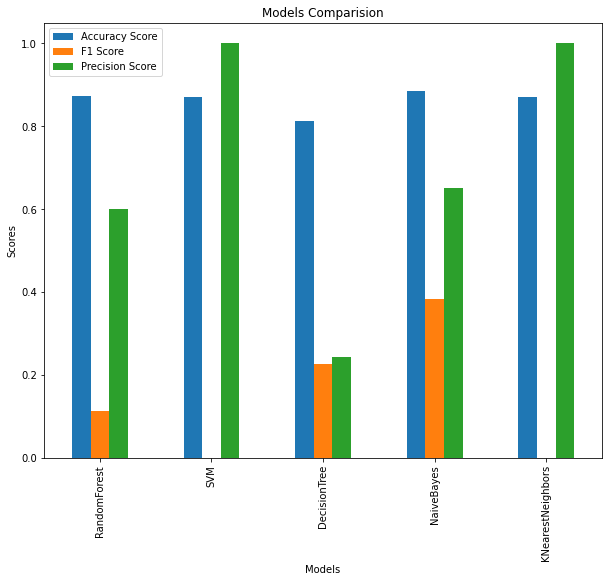

In [61]:
compare_df.plot(kind='bar',figsize=(10,8))
plt.title('Models Comparision')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()